In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Importing the Flight Price Prediction Dataset:

In [ ]:
ftrain=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Flight_Train.csv')
ftest=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Flight_Train.csv')

Identification of data types:

In [ ]:
ftrain.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
ftest.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Size of the dataset:

In [ ]:
ftrain.shape

(10683, 11)

In [ ]:
ftest.shape

(10683, 11)

Statistical Summary of Numeric Variables:

In [ ]:
ftrain.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0           IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1        Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2      Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3           IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4           IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302
...            ...             ...       ...  ...         ...             ...    ...
10678     Air Asia       9/04/2019   Kolkata  ...    non-stop         No info   4107
10679    Air India      27/04/2019   Kolkata  ...    non-stop         No info   4145
10680  Jet Airways      27/04/2019  Banglore  ...    non-stop         No info   7229
10681      Vistara      01/03/2019  Banglore  ...    non-stop         No info  12648
10682    Air India       9/05/2

Non-Graphical Univariate Analysis:

In [ ]:
#To get the count of unique values:

ftrain['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
#To get the count of unique values:

ftrain['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → RPR → VTZ → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → JDH → JAI → DEL → HYD             1
BOM → JAI → DEL → HYD                   1
BOM → CCU → HYD                         1
Name: Route, Length: 128, dtype: int64

In [ ]:
#To get the count of unique values:

ftrain['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#Finding null values

print(ftrain.isnull().sum(axis = 0))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
print(ftest.isnull().sum(axis = 0))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
#Remove Null Values

ftrain.Route.fillna(value=14.454200,inplace=True)
ftrain.Total_Stops.fillna(value=14.454200,inplace=True)
ftest.Route.fillna(value=14.454200,inplace=True)
ftest.Total_Stops.fillna(value=14.454200,inplace=True)

In [ ]:
#Check again if null values are handled

print(ftrain.isnull().sum(axis = 0))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [ ]:
print(ftest.isnull().sum(axis = 0))

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


Data Pre-Processing:

In [ ]:
ftrain["Journey_day"] = ftrain['Date_of_Journey'].str.split('/').str[0].astype(int)
ftrain["Journey_month"] = ftrain['Date_of_Journey'].str.split('/').str[1].astype(int)
ftrain.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
ftrain["Dep_hour"] = pd.to_datetime(ftrain["Dep_Time"]).dt.hour
ftrain["Dep_min"] = pd.to_datetime(ftrain["Dep_Time"]).dt.minute
ftrain.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
ftrain["Arrival_hour"] = pd.to_datetime(ftrain.Arrival_Time).dt.hour
ftrain["Arrival_min"] = pd.to_datetime(ftrain.Arrival_Time).dt.minute
ftrain.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
ftest["Journey_day"] = ftest['Date_of_Journey'].str.split('/').str[0].astype(int)
ftest["Journey_month"] = ftest['Date_of_Journey'].str.split('/').str[1].astype(int)
ftest.drop(["Date_of_Journey"], axis = 1, inplace = True)

ftest["Dep_hour"] = pd.to_datetime(ftest["Dep_Time"]).dt.hour
ftest["Dep_min"] = pd.to_datetime(ftest["Dep_Time"]).dt.minute
ftest.drop(["Dep_Time"], axis = 1, inplace = True)

ftest["Arrival_hour"] = pd.to_datetime(ftest.Arrival_Time).dt.hour
ftest["Arrival_min"] = pd.to_datetime(ftest.Arrival_Time).dt.minute
ftest.drop(["Arrival_Time"], axis = 1, inplace = True)

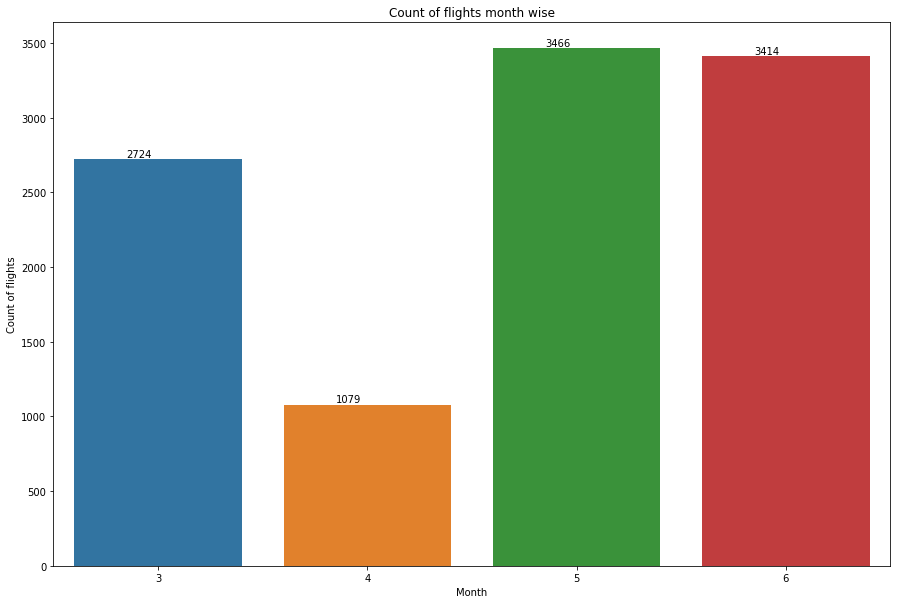

In [ ]:
#Determine the total number of flights month-wise
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = ftrain)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

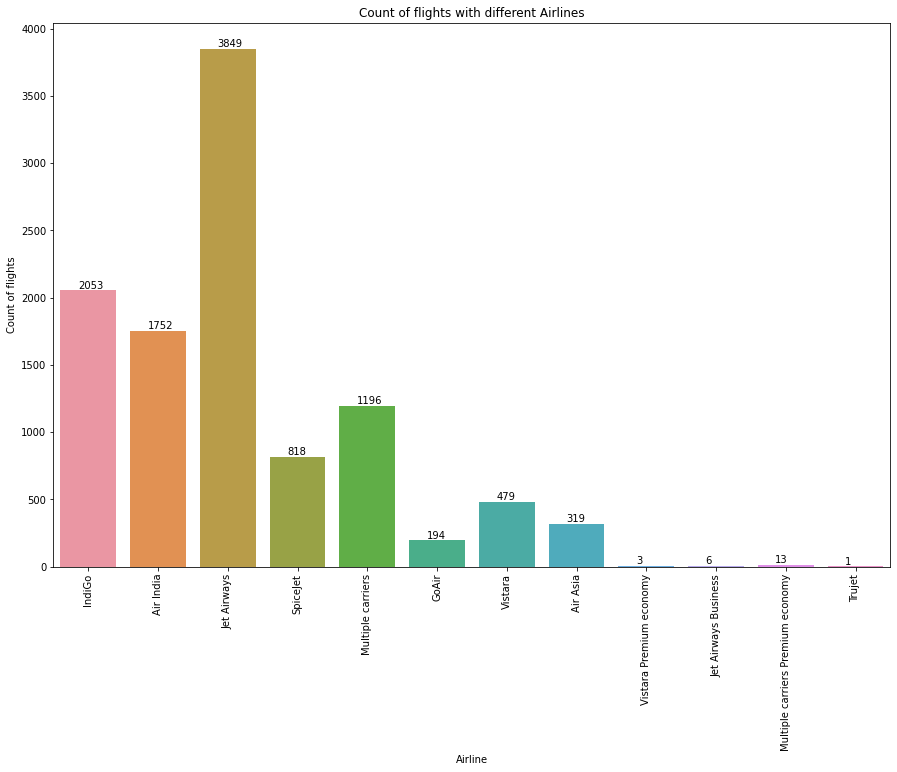

In [ ]:
#Determine count of flights w.r.t Airlines
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = ftrain)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

Observation: The above graph displays that Jet Airways has more number of flights compared to the rest, whereas Vistara Premium economy, Trujet almost have negligible amount of flights

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

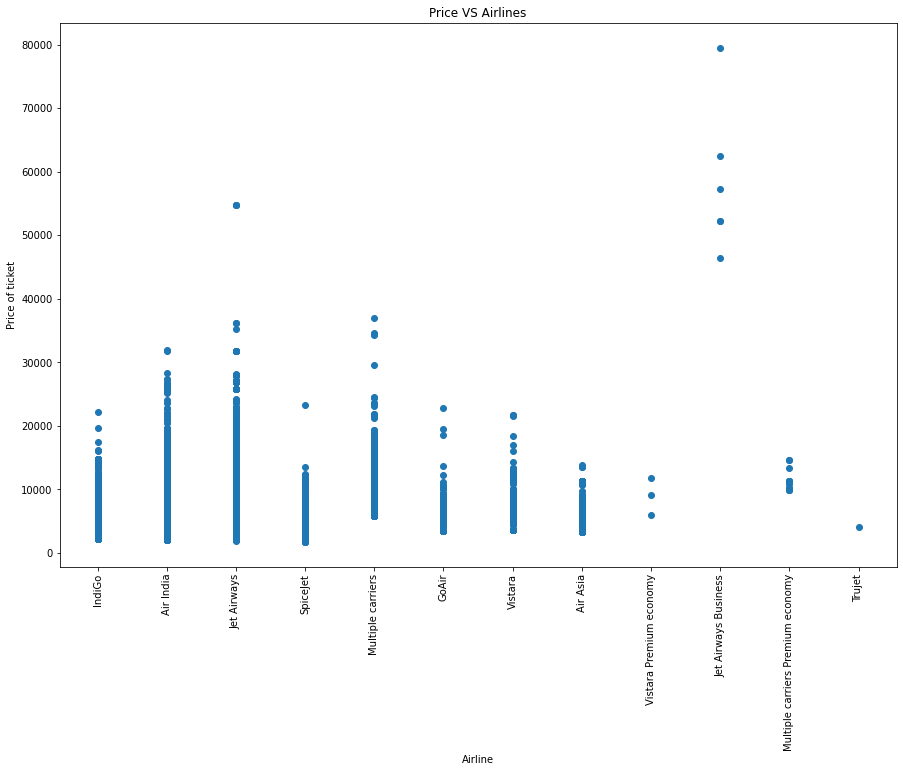

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(ftrain['Airline'], ftrain['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

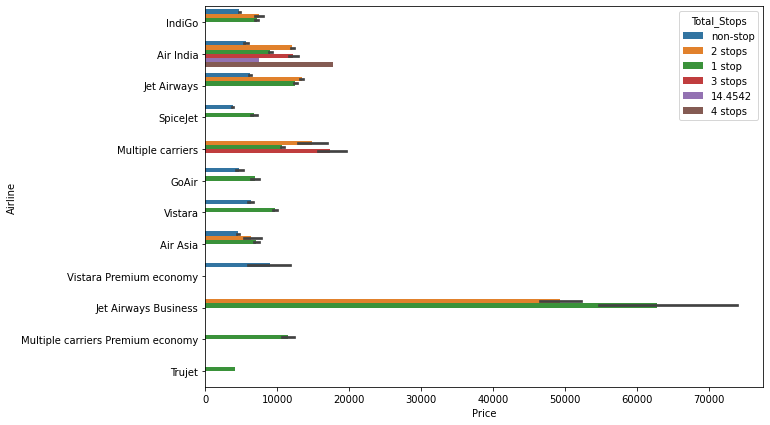

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y=ftrain['Airline'],x=ftrain['Price'],hue=ftrain['Total_Stops'])

In [ ]:
#checking for correaltion between variables

ftrain.corr()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Price,1.000000,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155
Journey_day,-0.153738,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511
Journey_month,-0.103651,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626
Dep_hour,0.006819,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909
Dep_min,-0.024492,-0.008261,-0.059238,-0.024806,1.000000,0.043054,-0.017594
Arrival_hour,0.024264,-0.003192,-0.003941,0.005215,0.043054,1.000000,-0.154362
Arrival_min,-0.086155,-0.017511,-0.100626,0.067909,-0.017594,-0.154362,1.000000


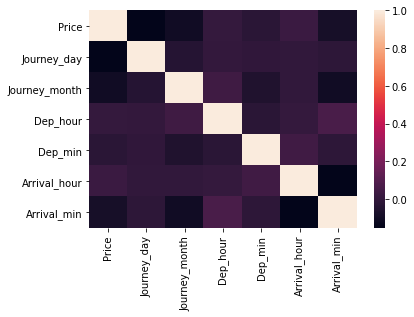

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(ftrain.corr())

In [ ]:
#Checking the skewness

ftrain.skew()

Price            1.812552
Journey_day      0.118351
Journey_month   -0.387493
Dep_hour         0.113073
Dep_min          0.167029
Arrival_hour    -0.369988
Arrival_min      0.110945
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ftrain['Price'] = le.fit_transform(ftrain['Price'])
ftrain['Journey_day'] = le.fit_transform(ftrain['Journey_day'])
ftrain['Journey_month'] = le.fit_transform(ftrain['Journey_month'])
ftrain['Dep_hour'] = le.fit_transform(ftrain['Dep_hour'])
ftrain['Dep_min'] = le.fit_transform(ftrain['Dep_min'])
ftrain['Arrival_hour'] = le.fit_transform(ftrain['Arrival_hour'])
ftrain['Arrival_min'] = le.fit_transform(ftrain['Arrival_min'])
ftrain.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,65,8,0,22,4,1,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,669,0,2,5,10,13,3
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,1537,3,3,9,5,4,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,389,4,2,18,1,23,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,1457,0,0,16,10,21,7


In [ ]:
#dummifying data required for spliting the data

ftrain = pd.get_dummies(ftrain)
ftrain.head(5)

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_14.4542,Route_BLR → AMD → DEL,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,...,Duration_8h,Duration_8h 10m,Duration_8h 15m,Duration_8h 20m,Duration_8h 25m,Duration_8h 30m,Duration_8h 35m,Duration_8h 40m,Duration_8h 45m,Duration_8h 50m,Duration_8h 55m,Duration_8h 5m,Duration_9h,Duration_9h 10m,Duration_9h 15m,Duration_9h 20m,Duration_9h 25m,Duration_9h 30m,Duration_9h 35m,Duration_9h 40m,Duration_9h 45m,Duration_9h 50m,Duration_9h 55m,Duration_9h 5m,Total_Stops_14.4542,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,65,8,0,22,4,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,669,0,2,5,10,13,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1537,3,3,9,5,4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,389,4,2,18,1,23,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1457,0,0,16,10,21,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#spliting the data

X = ftrain.drop(labels=['Price'], axis=1)
y = ftrain['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Build the Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred=rf.predict(X_test)

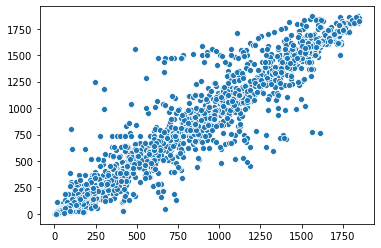

In [ ]:
sns.scatterplot(pred,y_test)

0.9395287486668724


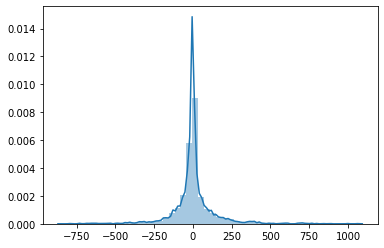

In [ ]:
from sklearn.metrics import r2_score
sns.distplot(y_test-pred)
print(r2_score(y_test,pred))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('mean_squared_error',mean_squared_error(y_test,pred))

mean_absolute_error 73.47745041093937
mean_squared_error 19641.50587333717


In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(rf,'FlightPrice.pkl')

['FlightPrice.pkl']